In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os
# download from here: https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/index#models
assert(os.listdir().count('pose_landmarker_heavy.task') == 1)
model_path = 'pose_landmarker_heavy.task'
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)
# STEP 3: Load the input image.
# MAKE SURE TO USE JPEG AND NOT PNG (PNG HAS FOUR CHANNELS)
image = mp.Image.create_from_file("samples/stage5.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
from mp_utils import *
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result, BOTH_ARM_MARKERS)

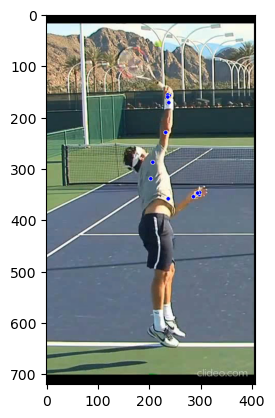

In [5]:
import matplotlib.pyplot as plt
plt.imshow(annotated_image)
plt.show()

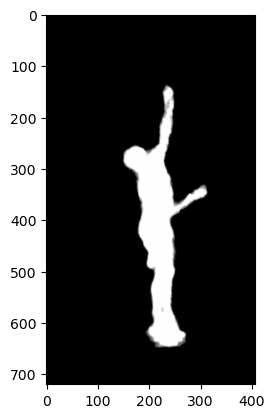

In [10]:
import matplotlib.pyplot as plt
import numpy as np
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(visualized_mask.astype(np.uint8))